# 0. Pytorch 버전과 MMDetection 버전 변화

In [1]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 487.0 kB/s eta 0:00:000:01m0:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 41.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1
    Uninstalling torchvision-0.15.1:
      Successfully uninstalled torchvision-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.


# 1. Installation

## Step 1. Install MMCV using MIM.

In [2]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 7.7 MB/s eta 0:00:00:00:0100:01


## Step 2. Install MMDetection from the source.

In [3]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36110, done.
remote: Counting objects: 100% (764/764), done.
remote: Compressing objects: 100% (392/392), done.
remote: Total 36110 (delta 390), reused 636 (delta 363), pack-reused 35346
Receiving objects: 100% (36110/36110), 52.12 MiB | 28.67 MiB/s, done.
Resolving deltas: 100% (25328/25328), done.
/kaggle/working/mmdetection
Obtaining file:///kaggle/working/mmdetection
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=102202 sha256=217dcdcbb5b69a436caf158423eed9bdd98c3ece5fcb41c2836fe650c240221b
  Stored in directory: /root/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools
  Running setup.py develop for mmdet


## Step 3. Verification

In [4]:
import mmdet
print(mmdet.__version__)

2.28.2


/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [5]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 9.7 MB/s eta 0:00:0000:0100:01
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /kaggle/working/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /kaggle/working/mmdetection


In [6]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

## Step 5. Data Download


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d andrewmvd/hard-hat-detection

In [ ]:
!mkdir hard-hat-detection
# unzip
!unzip -q hard-hat-detection.zip -d hard-hat-detection

### hard-hat-detection의 디렉토리 구조 보기

In [ ]:
# install tree first
!apt-get -q install tree

In [ ]:
!tree ./hard-hat-detection/annotations

In [ ]:
!tree ./hard-hat-detection/images

In [7]:
!pwd

/kaggle/working/mmdetection


###  이미지와 annotation 보기

[{'class_name': 'helmet', 'bndbox_coor': (99, 110, 134, 153)}, {'class_name': 'helmet', 'bndbox_coor': (272, 57, 315, 98)}, {'class_name': 'helmet', 'bndbox_coor': (0, 109, 28, 153)}, {'class_name': 'helmet', 'bndbox_coor': (389, 56, 414, 98)}]


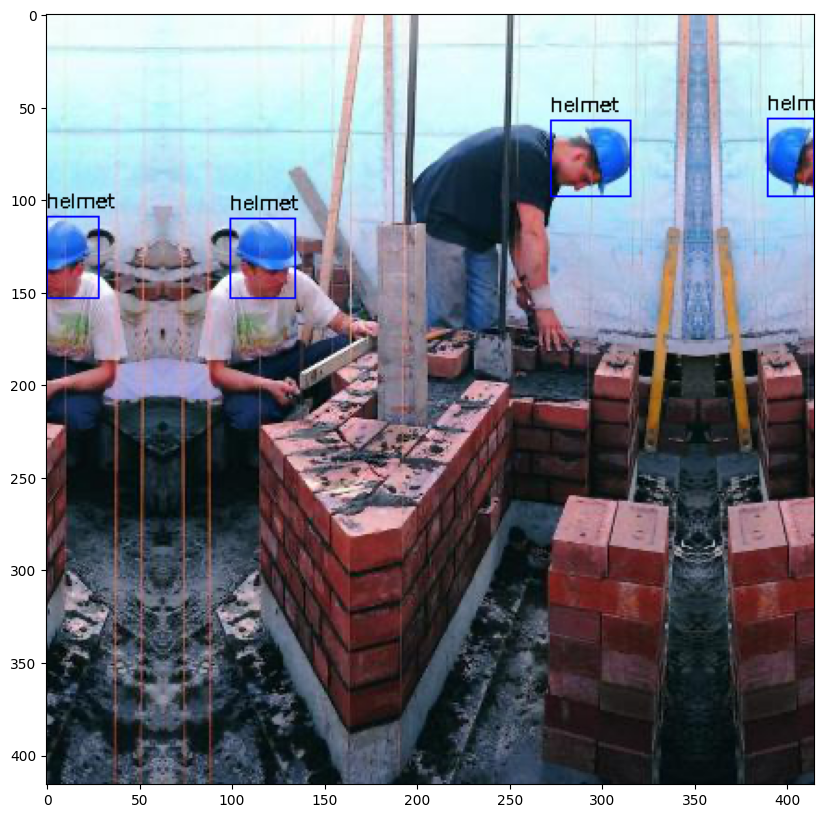

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

img_dir = "/kaggle/input/hard-hat-detection/images/"
xml_file = "/kaggle/input/hard-hat-detection/annotations/hard_hat_workers3656.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
    # print(obj.find('name').text)
    # break
    class_name = obj.find('name').text
    
    coords = obj.find('bndbox')
    x1 = int(coords.find('xmin').text)
    y1 = int(coords.find('ymin').text)
    x2 = int(coords.find('xmax').text)
    y2 = int(coords.find('ymax').text)
    bndbox_coor = (x1, y1, x2, y2)

    cv2.rectangle(dst, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=1)
    cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 0), thickness=1 )
    object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
    object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 데이터 나누기

In [9]:
import glob
import os
from sklearn.model_selection import train_test_split

dataset_path = '/kaggle/input/hard-hat-detection/'

image_list = glob.glob(dataset_path+'images/*')

In [10]:
train_image_paths, val_image_paths = train_test_split(image_list, train_size=0.8, random_state = 42)
val_image_paths, test_image_paths = train_test_split(val_image_paths, train_size=0.5, random_state = 42)

print('total: ', len(image_list))
print('train: ', len(train_image_paths), 'val: ',len(val_image_paths), 'test: ', len(test_image_paths))

total:  5000
train:  4000 val:  500 test:  500


In [11]:
train_image_paths[:3]

['/kaggle/input/hard-hat-detection/images/hard_hat_workers3810.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers2837.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers962.png']

In [12]:
val_image_paths[:3]

['/kaggle/input/hard-hat-detection/images/hard_hat_workers1780.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers3529.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers1501.png']

In [13]:
test_image_paths[:3]

['/kaggle/input/hard-hat-detection/images/hard_hat_workers2072.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers2575.png',
 '/kaggle/input/hard-hat-detection/images/hard_hat_workers3481.png']

### coco format으로 만들기

#### voc 포맷을 coco 포맷으로 변환하는 패키지

In [14]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 10.82 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [16]:
# 라벨 만들기
with open('./labels.txt', "w") as f:
    f.write("helmet\n")
    f.write("head\n")
    f.write("person\n")

In [17]:
# label 체크
!cat ./labels.txt

helmet
head
person


In [18]:
import pandas as pd

train_file_name = []
val_file_name = []
test_file_name = []

for image_path in train_image_paths:
    train_file_name.append(image_path.split('/')[-1].split('.')[0])
for image_path in val_image_paths:
    val_file_name.append(image_path.split('/')[-1].split('.')[0])
for image_path in test_image_paths:
    test_file_name.append(image_path.split('/')[-1].split('.')[0])

train_file_name.sort()
val_file_name.sort()
test_file_name.sort()

pd.Series(train_file_name).to_csv('./train.txt', header=False, index=False, sep=' ')
pd.Series(val_file_name).to_csv('./val.txt', header=False, index=False, sep=' ')
pd.Series(test_file_name).to_csv('./test.txt', header=False, index=False, sep=' ')

In [19]:
%cd voc2coco

/kaggle/working/mmdetection/voc2coco


In [20]:
!python voc2coco.py --ann_dir /kaggle/input/hard-hat-detection/annotations \
                    --ann_ids /kaggle/working/mmdetection/train.txt \
                    --labels /kaggle/working/mmdetection/labels.txt \
                    --output /kaggle/working/mmdetection/train.json \
                    --ext xml

!python voc2coco.py --ann_dir /kaggle/input/hard-hat-detection/annotations \
                    --ann_ids /kaggle/working/mmdetection/val.txt \
                    --labels /kaggle/working/mmdetection/labels.txt \
                    --output /kaggle/working/mmdetection/val.json \
                    --ext xml

!python voc2coco.py --ann_dir /kaggle/input/hard-hat-detection/annotations \
                    --ann_ids /kaggle/working/mmdetection/test.txt \
                    --labels /kaggle/working/mmdetection/labels.txt \
                    --output /kaggle/working/mmdetection/test.json \
                    --ext xml

Start converting !
100%|██████████████████████████████████████| 4000/4000 [00:23<00:00, 172.30it/s]
Start converting !
100%|████████████████████████████████████████| 500/500 [00:02<00:00, 177.50it/s]
Start converting !
100%|████████████████████████████████████████| 500/500 [00:02<00:00, 180.41it/s]


### json 파일 확인

In [ ]:
!sudo apt-get install jq

In [ ]:
!pwd

In [ ]:
!jq . ./hard-hat-detection/train.json > output.json

In [ ]:
!head -100 output.json

In [ ]:
!tail -100 output.json

# Train A Detector on A Customized Dataset

### lisa-traffic-light Dataset을 COCO Format으로 변환하기

In [25]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 VOCDataset을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class HelmetDataset(CocoDataset):
    CLASSES = ('helmet', 'head','person')

#### cfg 수정

In [23]:
%cd ../

/kaggle/working/mmdetection


In [27]:
!pwd

/kaggle/working/mmdetection


In [29]:
from mmcv import Config
cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-608_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 32

In [30]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'HelmetDataset'
cfg.data_root = './'

cfg.data.test.type = 'HelmetDataset'
cfg.data.test.data_root = './'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = '/kaggle/input/hard-hat-detection/images'

cfg.data.train.type = 'HelmetDataset'
cfg.data.train.data_root = './'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = '/kaggle/input/hard-hat-detection/images'

cfg.data.val.type = 'HelmetDataset'
cfg.data.val.data_root = './'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = '/kaggle/input/hard-hat-detection/images'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 3

# If we need to finetune a model based on a pre-trained detector,
# we need to use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'

# Set up working dir to save files and logs.
cfg.work_dir = ''

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
# cfg.optimizer.lr = 0.001 / 8
# cfg.lr_config.warmup = None

cfg.optimizer.lr = 0.001 / 8
cfg.optimizer.momentum = 0.95
cfg.log_config.interval = 5

# max epochs 12 
cfg.runner.max_epochs = 15 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 2

# Change the evaluation metric since we use customized dataset.
# note.
# detection evaluation에 map를 설정하면 iou가 0.5 일때만
# cocodata로 detection 할 때는 bbox를 설정해야 다양한 iou 기준 출력
# CocoDataset의 경우 metric을 bbox로 설정해야 함.
# (mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=5)
log_config = dict(
    interval=5,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=3,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
  

In [31]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [32]:
train_dataset # 4000개의 train imgage


HelmetDataset Train dataset with number of images 4000, and instance counts: 
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
| category   | count | category | count | category   | count | category | count | category | count |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
|            |       |          |       |            |       |          |       |          |       |
| 0 [helmet] | 15118 | 1 [head] | 4732  | 2 [person] | 530   |          |       |          |       |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+

In [33]:
test_dataset # 500개의 test image


HelmetDataset Train dataset with number of images 500, and instance counts: 
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
| category   | count | category | count | category   | count | category | count | category | count |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+
|            |       |          |       |            |       |          |       |          |       |
| 0 [helmet] | 1926  | 1 [head] | 657   | 2 [person] | 117   |          |       |          |       |
+------------+-------+----------+-------+------------+-------+----------+-------+----------+-------+

### Pre Trained 모델 다운로드

In [34]:
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth \
      -O checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth

--2023-05-18 07:22:54--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.38.121.210, 8.38.121.208, 8.38.121.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.38.121.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248093138 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  7.18MB/s    in 33s     

2023-05-18 07:23:28 (7.12 MB/s) - ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’ saved [248093138/248093138]



#### cfg 수정버전으로 모델 적용

In [35]:
from mmdet.models import build_detector

# Build the detector
# Add an attribute for visualization convenience

model = build_detector(cfg.model)

model.CLASSES = train_dataset.CLASSES

### 모델 학습 수행

In [37]:
import os.path as osp
import mmcv
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True)

2023-05-18 07:24:05,185 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-18 07:24:05,207 - mmdet - INFO - load checkpoint from local path: checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2023-05-18 07:24:05,449 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.convs_pred.0.weight: copying a param with shape torch.Size([255, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([24, 1024, 1, 1]).
size mismatch for bbox_head.convs_pred.0.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([24]).
size mismatch for bbox_head.convs_pred.1.weight: copying a param with shape torch.Size([255, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([24, 512, 1, 1]).
size mismatch for bbox_head.convs_pred.1.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([24]).
size mismatch for bbox_head.convs_pred.2.weight: copying a param with shape torch.Size([255, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([24, 256, 1, 1]).
size mismatch for bbox_head.convs_pred.2.bi

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 26.4 task/s, elapsed: 19s, ETA:     0s

2023-05-18 07:44:50,650 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.74s).
Accumulating evaluation results...


2023-05-18 07:44:52,876 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.592
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.312
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.249
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.348
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.423
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.42s).


2023-05-18 07:44:56,410 - mmdet - INFO - Epoch [6][5/1000]	lr: 1.250e-04, eta: 0:40:39, time: 0.701, data_time: 0.485, memory: 3834, loss_cls: 3.8468, loss_conf: 39.7121, loss_xy: 61.6949, loss_wh: 2.5000, loss: 107.7540, grad_norm: 636.2469
2023-05-18 07:44:57,585 - mmdet - INFO - Epoch [6][10/1000]	lr: 1.250e-04, eta: 0:40:37, time: 0.235, data_time: 0.012, memory: 3834, loss_cls: 1.2354, loss_conf: 24.9029, loss_xy: 37.1908, loss_wh: 1.0087, loss: 64.3378, grad_norm: 304.9503
2023-05-18 07:44:58,746 - mmdet - INFO - Epoch [6][15/1000]	lr: 1.250e-04, eta: 0:40:36, time: 0.232, data_time: 0.011, memory: 3834, loss_cls: 2.6435, loss_conf: 33.0039, loss_xy: 48.7055, loss_wh: 1.1730, loss: 85.5260, grad_norm: 382.9908
2023-05-18 07:45:00,397 - mmdet - INFO - Epoch [6][20/1000]	lr: 1.250e-04, eta: 0:40:36, time: 0.330, data_time: 0.012, memory: 3834, loss_cls: 4.3968, loss_conf: 26.5013, loss_xy: 45.0768, loss_wh: 1.5164, loss: 77.4914, grad_norm: 584.6856
2023-05-18 07:45:01,485 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 25.9 task/s, elapsed: 19s, ETA:     0s

2023-05-18 08:05:27,770 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.68s).
Accumulating evaluation results...


2023-05-18 08:05:29,954 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.312
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.594
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.290
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.293
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.343
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.310
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.438
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.438
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.438
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.471
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.44s).


2023-05-18 08:05:33,677 - mmdet - INFO - Epoch [11][5/1000]	lr: 1.250e-04, eta: 0:20:15, time: 0.737, data_time: 0.480, memory: 3834, loss_cls: 0.8010, loss_conf: 32.1407, loss_xy: 48.6815, loss_wh: 1.6082, loss: 83.2315, grad_norm: 386.7492
2023-05-18 08:05:34,873 - mmdet - INFO - Epoch [11][10/1000]	lr: 1.250e-04, eta: 0:20:14, time: 0.239, data_time: 0.014, memory: 3834, loss_cls: 8.7978, loss_conf: 25.7165, loss_xy: 52.8285, loss_wh: 0.8973, loss: 88.2400, grad_norm: 446.4167
2023-05-18 08:05:36,119 - mmdet - INFO - Epoch [11][15/1000]	lr: 1.250e-04, eta: 0:20:13, time: 0.249, data_time: 0.013, memory: 3834, loss_cls: 1.8861, loss_conf: 36.0465, loss_xy: 55.8046, loss_wh: 1.8816, loss: 95.6187, grad_norm: 664.4021
2023-05-18 08:05:37,251 - mmdet - INFO - Epoch [11][20/1000]	lr: 1.250e-04, eta: 0:20:12, time: 0.227, data_time: 0.010, memory: 3834, loss_cls: 1.3636, loss_conf: 28.3516, loss_xy: 64.5382, loss_wh: 1.1112, loss: 95.3646, grad_norm: 402.1150
2023-05-18 08:05:38,590 - mmd

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 26.6 task/s, elapsed: 19s, ETA:     0s

2023-05-18 08:26:07,732 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.42s).
Accumulating evaluation results...


2023-05-18 08:26:09,627 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.609
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.291
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.436
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.436
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.436
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.377
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.498
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.43s).


### 학습 모델로 결과 예측

In [ ]:
test_df.head(3)

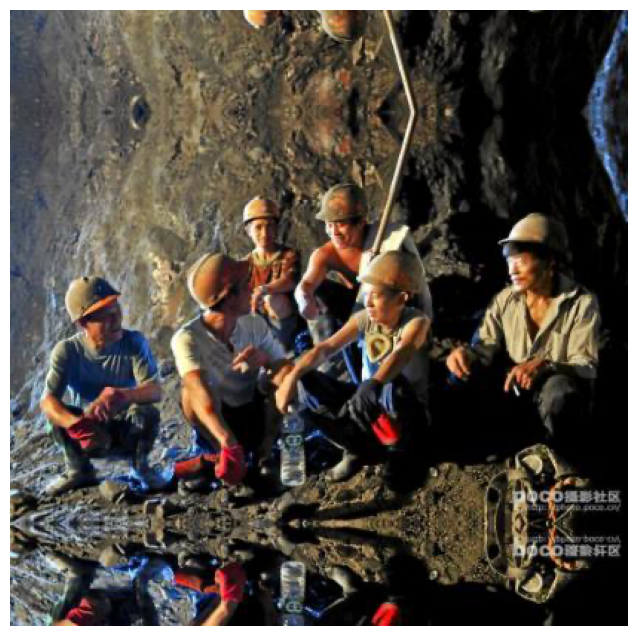

In [46]:
image = cv2.imread(test_image_paths[-1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

load checkpoint from local path: latest.pth
result:  3


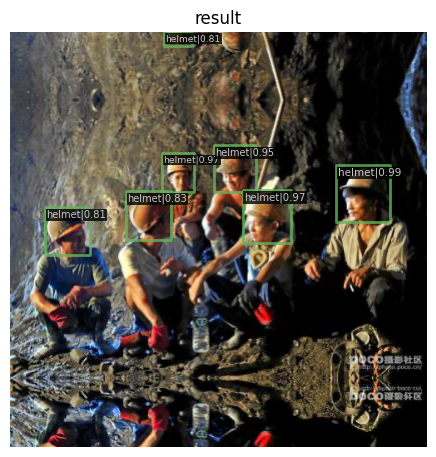

In [48]:
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot

checkpoint_file = 'latest.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread(test_image_paths[-1]) # BGR Image 사용 

result = inference_detector(model_ckpt, img)

print('result: ',len(result))

show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

### 모델 평가

In [38]:
from mmdet.datasets import build_dataloader, build_dataset

# test용 Dataset과 DataLoader 생성. 
data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': '/kaggle/input/hard-hat-detection/images/hard_hat_workers0.png', 'ori_filename': 'hard_hat_workers0.png', 'ori_shape': (416, 416, 3), 'img_shape': (608, 608, 3), 'pad_shape': (608, 608, 3), 'scale_factor': array([1.4615384, 1.4615384, 1.4615384, 1.4615384], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([0., 0., 0.], dtype=float32), 'std': array([255., 255., 255.], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[0.9451, 0.9451, 0.9451,  ..., 0.7373, 0.6706, 0.6431],
            [0.9451, 0.9451, 0.9451,  ..., 0.7490, 0.6784, 0.6392],
            [0.9451, 0.9451, 0.9451,  ..., 0.7529, 0.6824, 0.6392],
            ...,
            [0.3294, 0.3294, 0.3255,  ..., 0.8118, 0.8078, 0.8039],
            [0.3255, 0.3255, 0.3255,  ..., 0.8157, 0.8118, 0.8039],
            [0.3255, 0.3255, 0.3255,  ..., 0.8196, 0.8157, 0.8078]],
  
           [[0.9686, 0.9686, 0.9686,  ..., 0.7333, 0.6667, 0.6392],
       

In [49]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

checkpoint_file = 'latest.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# 위에서 만든 /content/show_test_output 디렉토리에 예측 결과 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.5)

load checkpoint from local path: latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 8.2 task/s, elapsed: 61s, ETA:     0s

In [50]:
metric = test_dataset.evaluate(results, metric=['bbox'])
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.76s).
Accumulating evaluation results...
DONE (t=0.35s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.610
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.295
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.275
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.376
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.258
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.416
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.416
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.416
 Average Recall     (AR) @[ IoU=0.50:0.95